# Homework 3

## Part 1: Imbalanced Dataset
This part of homework helps you practice to classify a highly imbalanced dataset in which the number of examples in one class greatly outnumbers the examples in another. You will work with the Credit Card Fraud Detection dataset hosted on Kaggle. The aim is to detect a mere 492 fraudulent transactions from 284,807 transactions in total. 

### Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

Due Date : TBD

### Name: Vipul H Harihar

### UNI: vhh2105

## 0 Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

## 1 Data processing and exploration
Download the Kaggle Credit Card Fraud data set. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')


#### Credit Card Data Set

In [3]:
#We will See some portions of it now
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 1.1 Examine the class label imbalance
Let's look at the dataset imbalance:

**Q1. How many observations are there in this dataset? How many of them have positive label (labeled as 1)?**

In [4]:
# Your Code Here
print('The Number of observations:',len(raw_df))
print('The Number of observations with positive label:',len(raw_df.loc[raw_df['Class']==1]))

The Number of observations: 284807
The Number of observations with positive label: 492


### 1.2 Clean, split and normalize the data
The raw data has a few issues. First the `Time` and `Amount` columns are too variable to use directly. Drop the `Time` column (since it's not clear what it means) and take the log of the `Amount` column to reduce its range.

In [5]:
cleaned_df = raw_df.copy()

# You don't want the `Time` column.
cleaned_df.pop('Time')

# The `Amount` column covers a huge range. Convert to log-space.
eps = 0.001 # 0 => 0.1¢
cleaned_df['Log Ammount'] = np.log(cleaned_df.pop('Amount')+eps)

**Q2. Split the dataset into development and test sets. Please set test size as 0.2 and random state as 42.**

In [6]:
cleaned_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Log Ammount'],
      dtype='object')

In [7]:
# Your Code Here
num_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Log Ammount']
features=cleaned_df[num_features]
target = cleaned_df['Class']
X_dev, X_test, y_dev, y_test = train_test_split(features, target, test_size = .2, random_state = 42)


**Q3. Normalize the input features using the sklearn StandardScaler. Print the shape of your development features and test features.**

In [8]:
# Your Code Here
scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)
X_test =  scaler.transform(X_test)
print('Development Features Shape:', X_dev.shape)
print('Test Features Shape:', X_test.shape)
print('Target y_dev Shape:',y_dev.shape)
print('Test y_test Shape:',y_test.shape)

Development Features Shape: (227845, 29)
Test Features Shape: (56962, 29)
Target y_dev Shape: (227845,)
Test y_test Shape: (56962,)


In [9]:
print("X_dev is as following:\n", X_dev)
print("\nX_test is as following:\n", X_test)

X_dev is as following:
 [[ 0.99785119 -0.22962626 -0.20738468 ...  0.11248883 -0.14374055
  -0.31686129]
 [-0.205221   -0.37821992  1.02754428 ... -0.92189789 -0.43984143
   0.43750859]
 [ 0.03655821  0.49556347 -0.37003324 ...  0.51372993  0.21235767
  -0.22658654]
 ...
 [-0.07533181  0.59962034  1.0072428  ... -0.3013968  -0.59571596
  -0.7770867 ]
 [-1.50615534  1.42172842 -1.66405501 ...  1.23673372  1.01755287
  -1.45508603]
 [ 0.62923844 -0.47354037  0.25598759 ...  0.00310728  0.11623211
   0.88321832]]

X_test is as following:
 [[ -8.43953559   5.18252006 -12.31324996 ...  -5.02350367  -3.16294175
    1.46219527]
 [  0.1730534   -1.65602032  -0.08791401 ...   0.10210496   0.30863538
    1.63850969]
 [  0.71421679  -0.35634288   0.11194078 ...   0.02847206   0.013272
    0.24334202]
 ...
 [  0.02018331  -0.06601034  -0.83557264 ...   0.89063984   1.0738269
   -0.45017489]
 [ -0.25325795   0.59873588   1.10429699 ...   0.10094377  -0.81883767
   -0.82309873]
 [ -0.81263064   0.59

#### Printing the shape of the input features here:

In [10]:
print("The shape of development features:",X_dev.shape)
print("The shape of test features:",X_test.shape)


The shape of development features: (227845, 29)
The shape of test features: (56962, 29)


### 1.3 Define the model and metrics
**Q4. First, fit a default logistic regression model. Print the AUC and average precision of 5-fold cross validation.**

In [11]:
# Your Code Here

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
lr = LogisticRegression()
scores  = cross_validate(lr,X_dev,y_dev,cv=5,
                        scoring = ['roc_auc','average_precision'],
                        return_train_score=True)
print('Test Average AUC:',scores['test_roc_auc'].mean())
print('Test Average precision:',scores['test_average_precision'].mean())

Test Average AUC: 0.9737187470946873
Test Average precision: 0.7608085616055361


**Q5.1. Perform random under sampling on the development set. What is the shape of your development features? How many  positive and negative labels are there in your development set? (Please set random state as 42 when performing random under sampling)**

We have observed the dataset is believed to be imbalanced in nature so the strategic way of splitting, would be handle the imbalnced data set using accurate strategic ways of splitting  -but right now 'Random Splitting' is what we need to handle


In [12]:
# Your Code Here
rus = RandomUnderSampler(replacement=False,random_state=42)
X_dev_subsample,y_dev_subsample = rus.fit_resample(X_dev,y_dev)
print('Shape of X_dev after RUS:',X_dev_subsample.shape)
print(y_dev_subsample.value_counts())



Shape of X_dev after RUS: (788, 29)
0    394
1    394
Name: Class, dtype: int64


**Q5.2. Fit a default logistic regression model using under sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random under sampling)**

In [123]:
# Your Code Here
sample_pipe = imb_make_pipeline(rus,lr)
scores = cross_validate(sample_pipe,X_dev,y_dev,cv=5,
                       scoring = ['roc_auc','average_precision'],
                        return_train_score=True)

In [124]:
print('Average Test AUC:',scores['test_roc_auc'].mean())
print('Average Test Average Precision:',scores['test_average_precision'].mean())

Average Test AUC: 0.9747275319190603
Average Test Average Precision: 0.6385290663900257


**Q6.1. Perform random over sampling on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing random over sampling)**

In [15]:
# Your Code Here
ros = RandomOverSampler(random_state=42)
X_dev_oversample,y_dev_oversample = ros.fit_resample(X_dev,y_dev)
print('Shape of X_dev after ROS:',X_dev_oversample.shape)
print(y_dev_oversample.value_counts())

Shape of X_dev after ROS: (454902, 29)
0    227451
1    227451
Name: Class, dtype: int64


**Q6.2. Fit a default logistic regression model using over sampling. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing random over sampling)**

In [85]:
# Your Code Here
ros = RandomOverSampler(random_state=42)
oversample_pipe = imb_make_pipeline(ros,lr)
scores1 = cross_validate(oversample_pipe,X_dev,y_dev,cv=5,
                       scoring = ['roc_auc','average_precision'],
                        return_train_score=True)

In [125]:
print("Random Over Sampler\n")
print('Average  Test AUC:',scores1['test_roc_auc'].mean())
print('Average Test average precision:',scores1['test_average_precision'].mean())

Random Over Sampler

Average  Test AUC: 0.9767168082687585
Average Test average precision: 0.7514597725520428


**Q7.1. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development set. What is the shape of your development features? How many positive and negative labels are there in your development set? (Please set random state as 42 when performing SMOTE)**

In [18]:
# Your Code Here
smote = SMOTE(random_state=42)
X_dev_smote,y_dev_smote = smote.fit_resample(X_dev,y_dev)
print('After SMOTE X_dev Shape:',X_dev_smote.shape)
print("Let's look into values Positive Values & Negative Values")
print(y_dev_smote.value_counts())

After SMOTE X_dev Shape: (454902, 29)
Let's look into values Positive Values & Negative Values
0    227451
1    227451
Name: Class, dtype: int64


**Q7.2. Fit a default logistic regression model using SMOTE. Print the AUC and average precision of 5-fold cross validation. (Please set random state as 42 when performing SMOTE)**

In [19]:
# Your Code Here
smote_lr_pipe = imb_make_pipeline(smote,lr)
scores=cross_validate(smote_lr_pipe,X_dev,y_dev,cv=5,
                       scoring = ['roc_auc','average_precision'],
                        return_train_score=True)

In [20]:
print('The Average  Test SMOTE Score:',scores['test_roc_auc'].mean())
print('The Average Test Average Precision Score:',scores['test_average_precision'].mean())

The Average  Test SMOTE Score: 0.9743872326487046
The Average Test Average Precision Score: 0.7502073574259233


**Q8. Plot confusion matrices on the test set for all four models above. Comment on your result.**

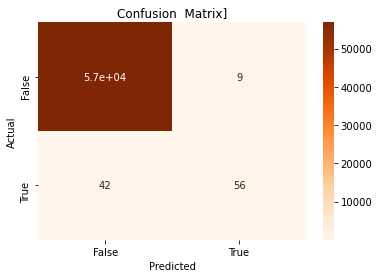

In [21]:
# Your Code Here
from sklearn.metrics import confusion_matrix
lr.fit(X_dev,y_dev)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[::,1]
cf_lr = confusion_matrix(y_test,y_pred)
ax =  sns.heatmap(cf_lr,annot=True,cmap='Oranges')
ax.set_title('Confusion  Matrix]')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

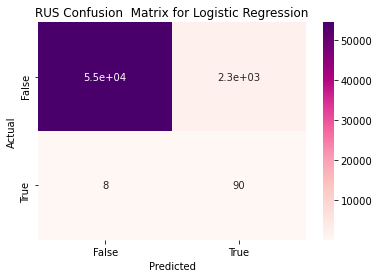

In [22]:
lr.fit(X_dev_subsample,y_dev_subsample)
y_pred_rus = lr.predict(X_test)
y_prob_rus = lr.predict_proba(X_test)[::,1]
cf_rus = confusion_matrix(y_test,y_pred_rus)
ax =  sns.heatmap(cf_rus,annot=True,cmap='RdPu')
ax.set_title('RUS Confusion  Matrix for Logistic Regression')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

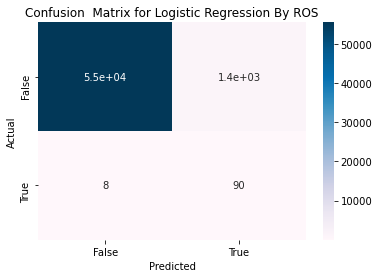

In [23]:
lr.fit(X_dev_oversample,y_dev_oversample)
y_pred_ros = lr.predict(X_test)
y_prob_ros = lr.predict_proba(X_test)[::,1]
cf_ros = confusion_matrix(y_test,y_pred_ros)
ax =  sns.heatmap(cf_ros,annot=True,cmap='PuBu')
ax.set_title('Confusion  Matrix for Logistic Regression By ROS')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

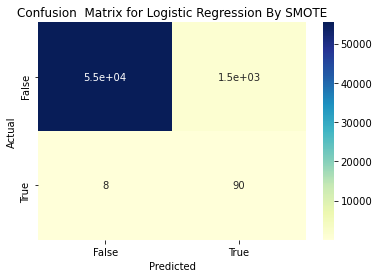

In [24]:
lr.fit(X_dev_smote,y_dev_smote)
y_pred_smote = lr.predict(X_test)
y_prob_smote = lr.predict_proba(X_test)[::,1]
cf_smote = confusion_matrix(y_test,y_pred_smote)
ax =  sns.heatmap(cf_smote,annot=True,cmap='YlGnBu')
ax.set_title('Confusion  Matrix for Logistic Regression By SMOTE')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [25]:
y_prob_rus.shape

(56962,)

## Comments
 
The four confusion matrix have been able to perform as they were expected. I would like to comment over them as I see the 4 matrix labels as follows:-

1. True Negative (TN): The values are all similar in values in the four models
<br>

2. False Positive (FP):
    a) When no sampling is performed this is the largest value 
    b) When we performed sampling the values have decreased
    c) When we performed random over sampling these values were the smallest
<br>

3. False Negative(FN):
    a) When no sampling is performed 42 is the largest value
    b) When Sampling was performed the value was decresed to 8 with sampling
<br>

4. True Positive(TP): 
    a) When no sampling is performed 56 is the samllest value
    b) When the sampling was performed the value increased to 90
<br>
Hence all the plots have been compared on bases of their TN,FP,FN and TP values.

**Q9. Plot the ROC for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

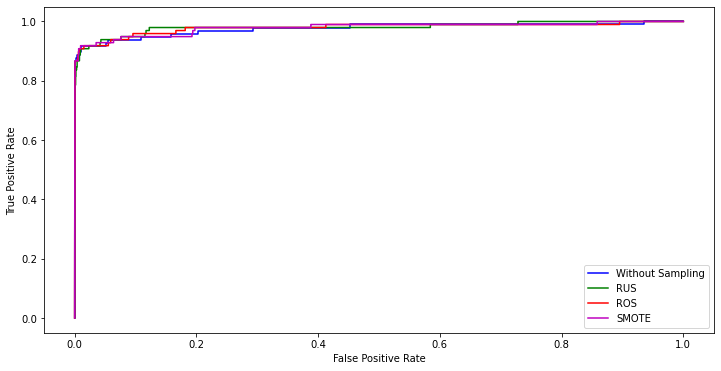

In [128]:
# Your Code Here
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_prob)
fpr_rus, tpr_rus, _ = metrics.roc_curve(y_test,  y_prob_rus)
fpr_ros, tpr_ros, _ = metrics.roc_curve(y_test,  y_prob_ros)
fpr_smote, tpr_smote, _ = metrics.roc_curve(y_test,  y_prob_smote)

plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,'b',label='Without Sampling')
plt.plot(fpr_rus,tpr_rus,'g',label='RUS')
plt.plot(fpr_ros,tpr_ros,'r',label='ROS')
plt.plot(fpr_smote,tpr_smote,'m',label='SMOTE')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

#### Comment


In [129]:

print("\nWithout Sampling\np value=",p.mean(),"\nr value=",r.mean())
print("\nRandom Over Sampler")
print('Average  Test AUC:',scores1['test_roc_auc'].mean())
print('Average Test average precision:',scores1['test_average_precision'].mean())
print("p_ros value=",p.mean(),"\nr_ros value=",r_ros.mean())
print("\nRandom Under Sampler:")
print('Average  Test AUC:',scores2['test_roc_auc'].mean())
print('Average Test average precision:',scores2['test_average_precision'].mean())
print("np_rus value=",p_rus.mean(),"\nr_rus value=",r_rus.mean())
print("\nSMOTE:")
print('Average  Test AUC:',scores3['test_roc_auc'].mean())
print('Average Test average precision:',scores3['test_average_precision'].mean())
print("np_smote value=",p_smote.mean(),"\nr_smote value=",r_smote.mean())




Without Sampling
p value= 0.012316952421866714 
r value= 0.9739372654022486

Random Over Sampler
Average  Test AUC: 0.9767168082687585
Average Test average precision: 0.7514597725520428
p_ros value= 0.012316952421866714 
r_ros value= 0.9768516998697007

Random Under Sampler:
Average  Test AUC: 0.9747275319190603
Average Test average precision: 0.6385290663900257
np_rus value= 0.014206069614097755 
r_rus value= 0.9725710011232939

SMOTE:
Average  Test AUC: 0.9743872326487046
Average Test average precision: 0.7502073574259233
np_smote value= 0.012330334288942757 
r_smote value= 0.9753651165453452


As we can see from the above plots and the values the ROS Curve has more area as compared to the others thus ROS is performing better for My Case models while usually SMOTE is believed to perform better. I have stated the results to understand the thing in a better way. Thus it is different might be due to some training processing done in internal kernel that caused this.

**Q10. Plot the precision-recall curve for all four models above in a single plot. Make sure to label the axes and legend. Comment on your result.**

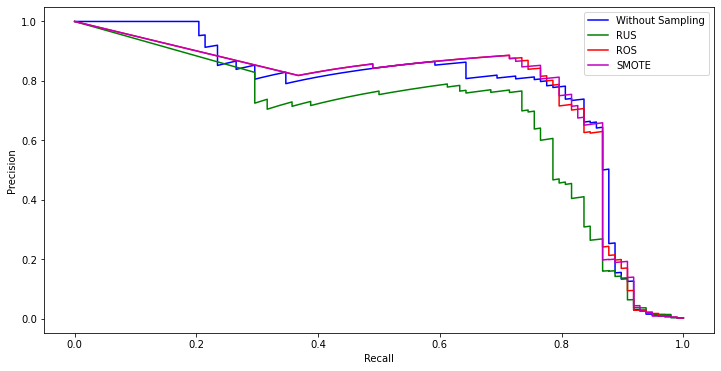

In [130]:
# Your Code Here
from sklearn.metrics import precision_recall_curve
p,r,_ = precision_recall_curve(y_test,y_prob)
p_rus,r_rus,_ = precision_recall_curve(y_test,y_prob_rus)
p_ros,r_ros,_ = precision_recall_curve(y_test,y_prob_ros)
p_smote,r_smote,_ = precision_recall_curve(y_test,y_prob_smote)

plt.figure(figsize=(12,6))
plt.plot(r,p,'b',label='Without Sampling')
plt.plot(r_rus,p_rus,'g',label='RUS')
plt.plot(r_ros,p_ros,'r',label='ROS')
plt.plot(r_smote,p_smote,'m',label='SMOTE')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.legend()
plt.show()

#### Comment

In [122]:

print("\nWithout Sampling\np value=",p.mean(),"\nr value=",r.mean())
print("\nRandom Over Sampler")
print('Average  Test AUC:',scores1['test_roc_auc'].mean())
print('Average Test average precision:',scores1['test_average_precision'].mean())
print("p_ros value=",p.mean(),"\nr_ros value=",r_ros.mean())
print("\nRandom Under Sampler:")
print('Average  Test AUC:',scores2['test_roc_auc'].mean())
print('Average Test average precision:',scores2['test_average_precision'].mean())
print("np_rus value=",p_rus.mean(),"\nr_rus value=",r_rus.mean())
print("\nSMOTE:")
print('Average  Test AUC:',scores3['test_roc_auc'].mean())
print('Average Test average precision:',scores3['test_average_precision'].mean())
print("np_smote value=",p_smote.mean(),"\nr_smote value=",r_smote.mean())




Without Sampling
p value= 0.012316952421866714 
r value= 0.9739372654022486

Random Over Sampler
Average  Test AUC: 0.9767168082687585
Average Test average precision: 0.7514597725520428
p_ros value= 0.012316952421866714 
r_ros value= 0.9768516998697007

Random Under Sampler:
Average  Test AUC: 0.9747275319190603
Average Test average precision: 0.6385290663900257
np_rus value= 0.014206069614097755 
r_rus value= 0.9725710011232939

SMOTE:
Average  Test AUC: 0.9743872326487046
Average Test average precision: 0.7502073574259233
np_smote value= 0.012330334288942757 
r_smote value= 0.9753651165453452


As we can see from the above plots and the values the Precision Recall Curves has more area as compared to the others thus Random Over Sampler is performing better for My Case models while usually SMOTE is believed to perform better. I have stated the results to understand the conclusion in a better way. Thus it is might be due to some training processing done in internal kernel and iterations that caused this ROS to perform better than the Smote

**Q11. Adding class weights to a logistic regression model. Print the AUC and average precision of 5-fold cross validation. Also, plot its confusion matrix on test set.**

Average  test Class Weights: 0.9767058445360919
Average Test average precision: 0.7509550474845972


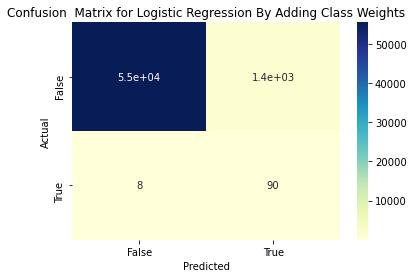

In [28]:
# Your Code Here
lr_w = LogisticRegression(class_weight='balanced')


scores=cross_validate(lr_w,X_dev,y_dev,cv=5,
                     scoring = ['roc_auc','average_precision'])

print('Average  test Class Weights:',scores['test_roc_auc'].mean())
print('Average Test average precision:',scores['test_average_precision'].mean())
lr_w.fit(X_dev,y_dev)
y_pred_w = lr_w.predict(X_test)
y_prob_w = lr_w.predict_proba(X_test)[::,1]
cf_w = confusion_matrix(y_test,y_pred_w)
ax =  sns.heatmap(cf_w,annot=True,cmap='YlGnBu')
ax.set_title('Confusion  Matrix for Logistic Regression By Adding Class Weights')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

**Q12. Plot the ROC and the precision-recall curve for default Logistic without any sampling method and this balanced Logistic model in two single plots. Make sure to label the axes and legend. Comment on your result.**

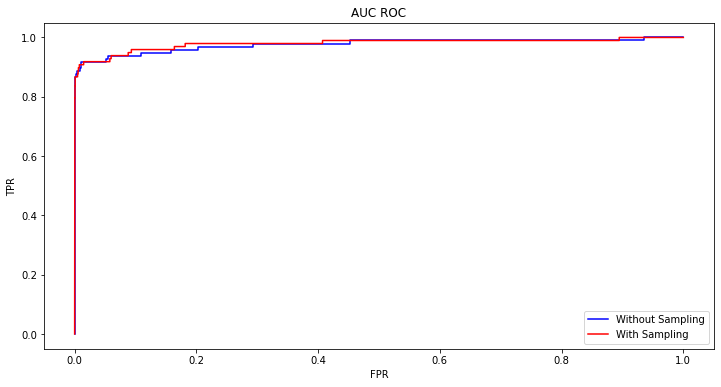

In [131]:
fpr_w,tpr_w,_ = metrics.roc_curve(y_test,y_prob_w)
plt.figure(figsize=(12,6))
plt.plot(fpr,tpr,'b',label='Without Sampling')
plt.plot(fpr_w,tpr_w,'r',label='With Sampling')
# look into it
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('AUC ROC')
plt.legend()
plt.show()

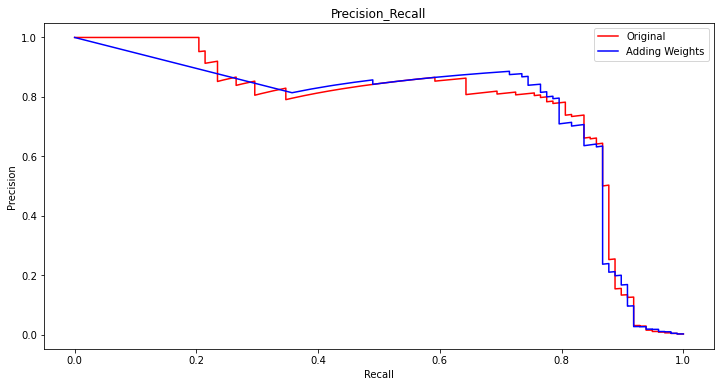

In [30]:
# Your Code Here
p_w,r_w,_ = precision_recall_curve(y_test,y_prob_w)

plt.figure(figsize=(12,6))
plt.plot(r,p,'r',label='Original')
plt.plot(r_w,p_w,'b',label='Adding Weights')
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision_Recall')
plt.legend()
plt.show()

## Comment
The curve with adding  weights is more smooth than the original one.  Similar path is being observed by them.
Average  test Class Weights: 0.9767058445360919
Average Test average precision: 0.7509550474845972
while without weights it is:
Test Average AUC: 0.9737187470946873
Test Average precision: 0.7608085616055361
Therefore we can see the results have been proof of the weighted balanced model to perform good as compared to the base model without any modifications. 

## Part 2: Unsupervised Learning

In this part, we will be applying unsupervised learning approaches to a problem in computational biology. Specifically, we will be analyzing single-cell genomic sequencing data. Single-cell genomics is a set of revolutionary new technologies which can profile the genome of a specimen (tissue, blood, etc.) at the resolution of individual cells. This increased granularity can help capture intercellular heterogeneity, key to better understanding and treating complex genetic diseases such as cancer and Alzheimer's. 

<img src="https://cdn.10xgenomics.com/image/upload/v1574196658/blog/singlecell-v.-bulk-image.png" width="800px"/>

<center>Source: 10xgenomics.com/blog/single-cell-rna-seq-an-introductory-overview-and-tools-for-getting-started</center>

A common challenge of genomic datasets is their high-dimensionality: a single observation (a cell, in the case of single-cell data) may have tens of thousands of gene expression features. Fortunately, biology offers a lot of structure - different genes work together in pathways and are co-regulated by gene regulatory networks. Unsupervised learning is widely used to discover this intrinsic structure and prepare the data for further analysis.

### Dataset: single-cell RNASeq of mouse brain cells

We will be working with a single-cell RNASeq dataset of mouse brain cells. In the following gene expression matrix, each row represents a cell and each column represents a gene. Each entry in the matrix is a normalized gene expression count - a higher value means that the gene is expressed more in that cell. The dataset has been pre-processed using various quality control and normalization methods for single-cell data. 

Data source is on Coursework.

In [31]:
cell_gene_counts_df = pd.read_csv('mouse_brain_cells_gene_counts.csv', index_col='cell')
cell_gene_counts_df.columns

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610009B14Rik',
       '0610009B22Rik', '0610009D07Rik',
       ...
       'Zwint', 'Zxda', 'Zxdb', 'Zxdc', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6'],
      dtype='object', length=18585)

Note the dimensionality - we have 1000 cells (observations) and 18,585 genes (features)!

We are also provided a metadata file with annotations for each cell (e.g. cell type, subtissue, mouse sex, etc.)

In [32]:
cell_metadata_df = pd.read_csv('mouse_brain_cells_metadata.csv')
cell_metadata_df

,cell,cell_ontology_class,subtissue,mouse.sex,mouse.id,plate.barcode,n_genes,n_counts
0,A1.B003290.3_38_F.1.1,astrocyte,Striatum,F,3_38_F,B003290,3359,390075.0
1,A1.B003728.3_56_F.1.1,astrocyte,Striatum,F,3_56_F,B003728,1718,776436.0
2,A1.MAA000560.3_10_M.1.1,oligodendrocyte,Cortex,M,3_10_M,MAA000560,3910,1616084.0
3,A1.MAA000564.3_10_M.1.1,endothelial cell,Striatum,M,3_10_M,MAA000564,4352,360004.0
4,A1.MAA000923.3_9_M.1.1,astrocyte,Hippocampus,M,3_9_M,MAA000923,2248,290282.0
...,...,...,...,...,...,...,...,...
995,E2.MAA000902.3_11_M.1.1,astrocyte,Striatum,M,3_11_M,MAA000902,3026,3134463.0
996,E2.MAA000926.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000926,3085,744301.0
997,E2.MAA000932.3_11_M.1.1,endothelial cell,Hippocampus,M,3_11_M,MAA000932,2277,519257.0
998,E2.MAA000944.3_9_M.1.1,oligodendrocyte,Cortex,M,3_9_M,MAA000944,3234,1437895.0


Different cell types

In [33]:
cell_metadata_df['cell_ontology_class'].value_counts()

oligodendrocyte                   385
endothelial cell                  264
astrocyte                         135
neuron                             94
brain pericyte                     58
oligodendrocyte precursor cell     54
Bergmann glial cell                10
Name: cell_ontology_class, dtype: int64

Different subtissue types (parts of the brain)

In [34]:
cell_metadata_df['subtissue'].value_counts()

Cortex         364
Hippocampus    273
Striatum       220
Cerebellum     143
Name: subtissue, dtype: int64

Our goal in this exercise is to use dimensionality reduction and clustering to visualize and better understand the high-dimensional gene expression matrix. We will use the following pipeline, which is common in single-cell analysis:
1. Use PCA to project the gene expression matrix to a lower-dimensional linear subspace.
2. Cluster the data using K-means on the first 20 principal components.
3. Use t-SNE to project the first 20 principal components onto two dimensions. Visualize the points and color by their clusters from (2).

## 1 PCA

**Q1. Perform PCA and project the gene expression matrix onto its first 50 principal components. You may use `sklearn.decomposition.PCA`.**

In [35]:
### Your code here
from sklearn.decomposition import PCA
pca = PCA(n_components = 50, random_state = 0) 
cell_gene_counts_df_pca = pca.fit_transform(cell_gene_counts_df)

In [36]:
 cell_gene_counts_df.shape

(1000, 18585)

In [37]:
cell_gene_counts_df.columns

Index(['0610005C13Rik', '0610007C21Rik', '0610007L01Rik', '0610007N19Rik',
       '0610007P08Rik', '0610007P14Rik', '0610007P22Rik', '0610009B14Rik',
       '0610009B22Rik', '0610009D07Rik',
       ...
       'Zwint', 'Zxda', 'Zxdb', 'Zxdc', 'Zyg11b', 'Zyx', 'Zzef1', 'Zzz3', 'a',
       'l7Rn6'],
      dtype='object', length=18585)

In [38]:
# Data Variance and Mean Investigation
print("Mean:",cell_gene_counts_df.mean(axis=0).mean())
print("Standarad Deviation:",cell_gene_counts_df.std(axis=0).mean())


Mean: -0.005819407100480489
Standarad Deviation: 0.9908549659661308


In [39]:
pca = PCA( n_components= 50)
cell_gene_counts_df_pca = pca.fit_transform(cell_gene_counts_df)

**Q2. Plot the cumulative proportion of variance explained as a function of the number of principal components. How much of the total variance in the dataset is explained by the first 20 principal components?**

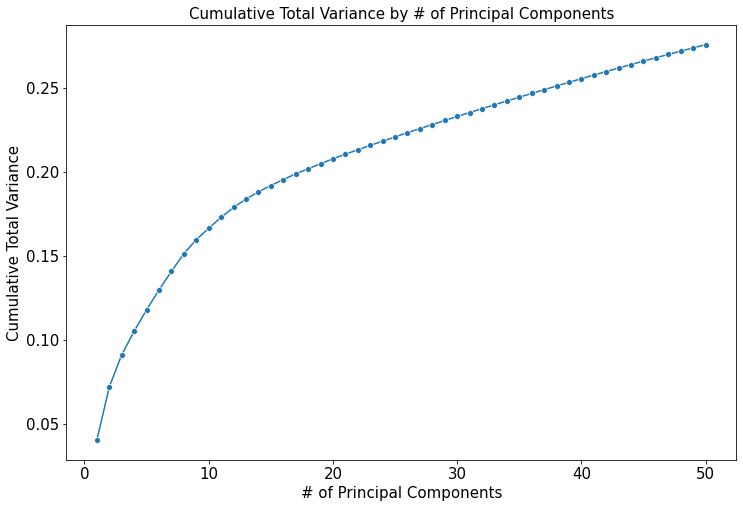

In [40]:
### Your code here
x = [i+1 for i in range(len(pca.explained_variance_ratio_))]
y = [sum(pca.explained_variance_ratio_[:i+1]) for i in range(len(pca.explained_variance_ratio_))]
plt.figure(figsize = (12, 8))
sns.lineplot(x = x, y = y, marker = 'o')
plt.title('Cumulative Total Variance by # of Principal Components', fontsize = 15)
plt.ylabel('Cumulative Total Variance', fontsize = 15)
plt.xlabel('# of Principal Components', fontsize = 15)
plt.tick_params(labelsize = 15)

In [41]:
print('Variance explained by top 20 principal components is:', pca.explained_variance_ratio_.cumsum()[19])

Variance explained by top 20 principal components is: 0.20765274369840656


In [42]:
### Your code here
idx_sorted =  pca.components_[0].argsort()[:-11:-1]
idx_sorted

array([11730, 15847, 13433,  9219, 13704,  3399,  8555,  4539, 11719,
        6068])

In [44]:
nums = pca.components_[0, pca.components_[0].argsort()[:-11:-1]]
print(' Top 10 weights for first component are: \n')
pd.DataFrame(nums, index = idx_sorted, columns = ["weights"], )

 Top 10 weights for first component are: 



,weights
11730,0.026673
15847,0.026595
13433,0.026588
9219,0.026539
13704,0.026347
3399,0.026221
8555,0.026173
4539,0.026022
11719,0.025979
6068,0.025853


**Q3. For the first principal component, report the top 10 loadings (weights) and their corresponding gene names.** In other words, which 10 genes are weighted the most in the first principal component?

In [45]:
### Your code here
nums = pca.components_[0, pca.components_[0].argsort()[:-11:-1]]
print(' Top 10 weights for first component are: \n')
pd.DataFrame(nums, index = cell_gene_counts_df.columns[idx_sorted], columns = ["weights"], )

 Top 10 weights for first component are: 



,weights
Nsg2,0.026673
St8sia3,0.026595
Ptpn5,0.026588
Kcnj4,0.026539
Rasgef1a,0.026347
Camkv,0.026221
Hpca,0.026173
Cpne5,0.026022
Nrsn2,0.025979
Erc2,0.025853


**Q4. Plot the projection of the data onto the first two principal components using a scatter plot.**

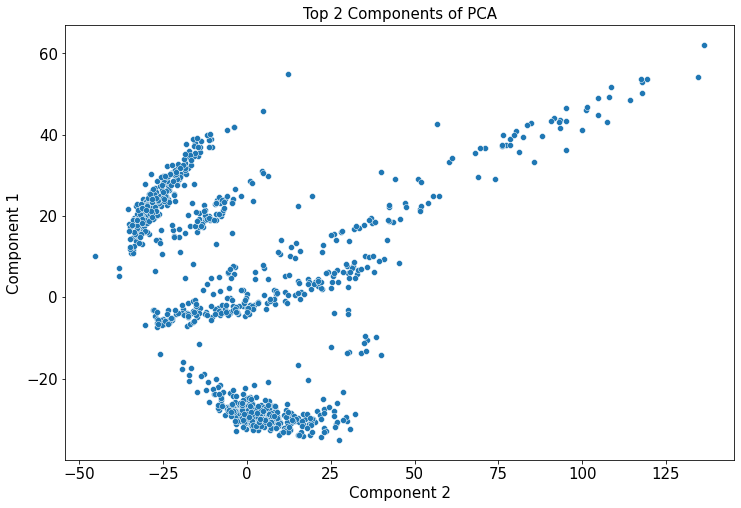

In [46]:
### Your code here
cell_gene_metadata_df = pd.DataFrame(cell_gene_counts_df_pca).join(cell_metadata_df) 
cell_gene_metadata_df
plt.figure(figsize = (12, 8))
sns.scatterplot(x = cell_gene_metadata_df[0], y = cell_gene_metadata_df[1])
plt.title('Top 2 Components of PCA', fontsize = 15)
plt.ylabel('Component 1', fontsize = 15)
plt.xlabel('Component 2', fontsize = 15)
plt.tick_params(labelsize = 15)

**Q5. Now, use a small multiple of four scatter plots to make the same plot as above, but colored by four annotations in the metadata: cell_ontology_class, subtissue, mouse.sex, mouse.id. Include a legend for the labels.** For example, one of the plots should have points projected onto PC 1 and PC 2, colored by their cell_ontology_class.

Text(0.5, 0.98, 'Top 2 Components of PCA by Annotation')

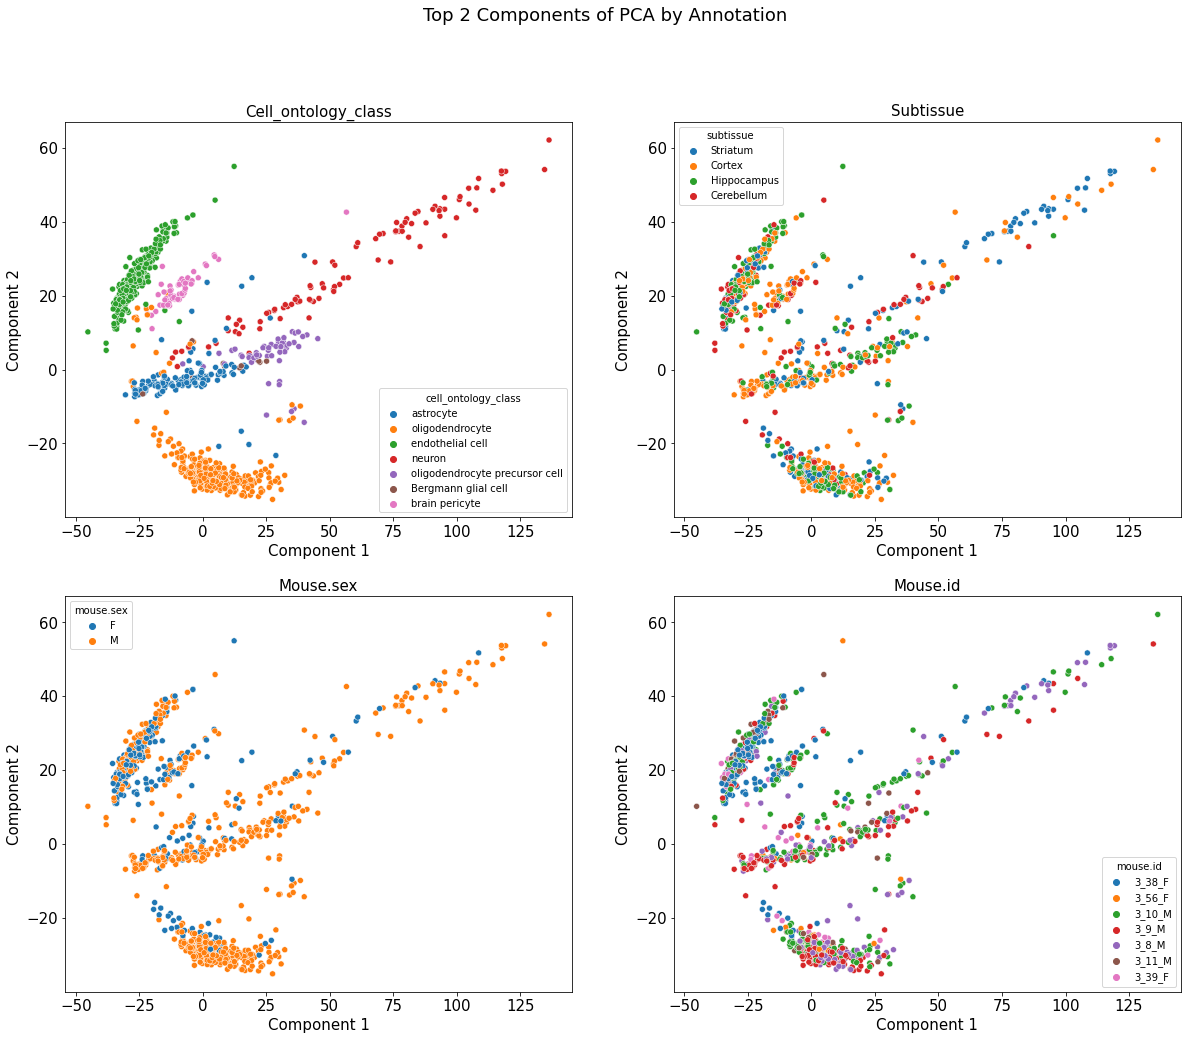

In [47]:
### Your code here
annotations = ['cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id']
fig, axs = plt.subplots(2, 2, figsize = (20, 16))
for i, annotation in enumerate(annotations):
    sns.scatterplot(x = cell_gene_metadata_df[0],
                    y = cell_gene_metadata_df[1],
                    hue = cell_gene_metadata_df[annotation],
                    ax = axs[i//2][i%2]) 
    axs[i//2][i%2].set_title('{}'.format(annotation.capitalize()), fontsize = 15) 
    axs[i//2][i%2].set_ylabel('Component 2', fontsize = 15) 
    axs[i//2][i%2].set_xlabel('Component 1', fontsize = 15) 
    axs[i//2][i%2].tick_params(labelsize = 15)
fig.suptitle('Top 2 Components of PCA by Annotation', fontsize = 18)

**Q6. Based on the plots above, the first two principal components correspond to which aspect of the cells? What is the intrinsic dimension that they are describing?**

### Solution:

It appears to me that the first two principal components correspond to the cell ontology class. The intrinsic dimension that they are describing is 2-D. In the given graphs, I observe that only the mouse sex and cell ontology class variables have less overlap in PC 1 and PC2. 
However, the clusters are more homogenous for the variable cell ontology class. 
So the first two principal correspond to the cell ontology class of variables. The intrinsic dimension is 7 as it represents the subclasses of the variables that the PC components correspond.

## 2 K-means

While the annotations provide high-level information on cell type (e.g. cell_ontology_class has 7 categories), we may also be interested in finding more granular subtypes of cells. To achieve this, we will use K-means clustering to find a large number of clusters in the gene expression dataset. Note that the original gene expression matrix had over 18,000 noisy features, which is not ideal for clustering. So, we will perform K-means clustering on the first 20 principal components of the dataset.

**Q7. Implement a `kmeans` function which takes in a dataset `X` and a number of clusters `k`, and returns the cluster assignment for each point in `X`. You may NOT use sklearn for this implementation. Use lecture 6, slide 14 as a reference.**

In [48]:
#from scipy.spatial.distance import cdist
def kmeans(X, k, iters=10):
    '''Groups the points in X into k clusters using the K-means algorithm.

    Parameters
    ----------
    X : (m x n) data matrix
    k: number of clusters
    iters: number of iterations to run k-means loop

    Returns
    -------
    y: (m x 1) cluster assignment for each point in X
    '''
    ### Your code here
    
    # randomly initialize cluster centroids as k random points in X
    def custom_distance(y, centroid):

        dist_list =[] #creating empty list 

        for p in y:
            temp=[] #empty list for temporary storage

            for q in range(len(centroid)):

                #storing the distance b/w points from all centroids
                temp.append(np.linalg.norm( p- centroid[q]))

            dist_list.append(temp) #adding the elements to the list

        return dist_list

    #creating centroids
    cents = X[np.random.choice(len(X), k, replace=False), :]  

    dist_list = custom_distance(X, cents) 

    closest_points = np.array([ np.argmin(p) for p in dist_list])

    for _ in range(iters): 
        centroids = []

        for index in range(k):
            temp_cent = X[closest_points==index].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) 
         
        dist_list = custom_distance(X, centroids)

        closest_points = np.array([ np.argmin(p) for p in dist_list])
        
    return np.array(closest_points)
        

Before applying K-means on the gene expression data, we will test it on the following synthetic dataset to make sure that the implementation is working.

Text(0, 0.5, '$x_2$')

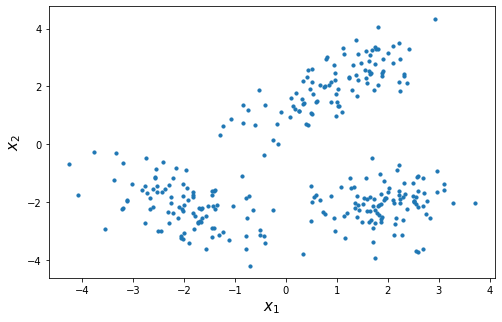

In [49]:
np.random.seed(0)
x_1 = np.random.multivariate_normal(mean=[1, 2], cov=np.array([[0.8, 0.6], [0.6, 0.8]]), size=100)
x_2 = np.random.multivariate_normal(mean=[-2, -2], cov=np.array([[0.8, -0.4], [-0.4, 0.8]]), size=100)
x_3 = np.random.multivariate_normal(mean=[2, -2], cov=np.array([[0.4, 0], [0, 0.4]]), size=100)
X = np.vstack([x_1, x_2, x_3])

plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

In [50]:
pca = PCA( n_components= 50)
df_pc = pca.fit_transform(cell_gene_counts_df)

**Q8. Apply K-means with k=3 to the synthetic dataset above. Plot the points colored by their K-means cluster assignments to verify that your implementation is working.**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, '$x_2$')

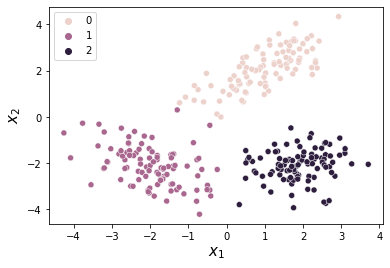

In [51]:
### Your code here
clusters_three = kmeans(X, 3, 10)
sns.scatterplot(X[:, 0], X[:, 1], hue = clusters_three.ravel() )
plt.legend()
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

In [52]:
### Your code here
clusters_pca_20 = kmeans(df_pc[:,:20], 20 , 10)
clusters_pca_20

array([19, 16, 15, 10, 16, 16, 10, 11, 10, 10, 10,  6,  3,  6, 10,  2, 14,
        5, 10,  1, 10,  6,  6, 11, 12, 10,  3, 12, 10, 11, 16,  1, 10,  1,
       15, 10, 11,  6,  3, 14,  7,  5, 12, 10, 10,  0,  3,  2,  0,  3, 14,
       10, 10, 18, 10, 10, 18,  7,  0, 17,  5, 17, 11, 16, 17, 10,  3, 17,
       10, 10, 10, 11, 16, 10,  4, 15,  8,  6, 10, 16,  3, 10,  6, 11,  8,
        1,  4, 11,  3, 11, 10, 10, 15,  8, 15, 10,  5, 10, 12, 13, 10,  7,
        5, 10, 10, 13, 14,  8, 17,  3,  3, 10, 16, 10, 14, 10, 15,  1,  1,
       14, 11,  6,  7, 17, 10,  0, 17,  0,  6, 10, 14,  4, 10,  3, 11, 10,
        5, 16, 13, 10, 12,  4, 10, 10, 16, 10, 12, 10,  7, 12, 14, 16, 18,
       17, 10,  6, 17, 12,  3, 15, 10,  3, 12,  7, 17, 10,  6,  6, 16, 18,
       12, 10, 10, 13,  3, 10, 10,  3, 16, 10, 15,  2, 10, 16, 10, 10, 10,
       15,  3,  3, 10, 13, 11, 16, 10, 10, 10,  7, 15, 12,  2, 15, 14,  6,
       14, 11, 14,  3, 14,  1, 14, 10, 16,  6,  7, 13, 14, 10,  7,  5, 10,
       10, 10, 10,  2,  3

**Q9. Use K-means with k=20 to cluster the first 20 principal components of the gene expression data.**

In [56]:
# ### Your code here
# plt.figure(figsize = (12, 5))
# for var in np.unique(clusters_pca_20):
#     comp = (clusters_pca_20 == var)
#     x = df_pc[ comp.ravel(), 0]
#     y = df_pc[ comp.ravel(), 1]
#     plt.scatter(x, y, label = var)

# plt.legend( loc = 'best')
# plt.xlabel('$x_1$', fontsize=15)
# plt.ylabel('$x_2$', fontsize=15)   
# plt.show()

Text(0, 0.5, '$x_2$')

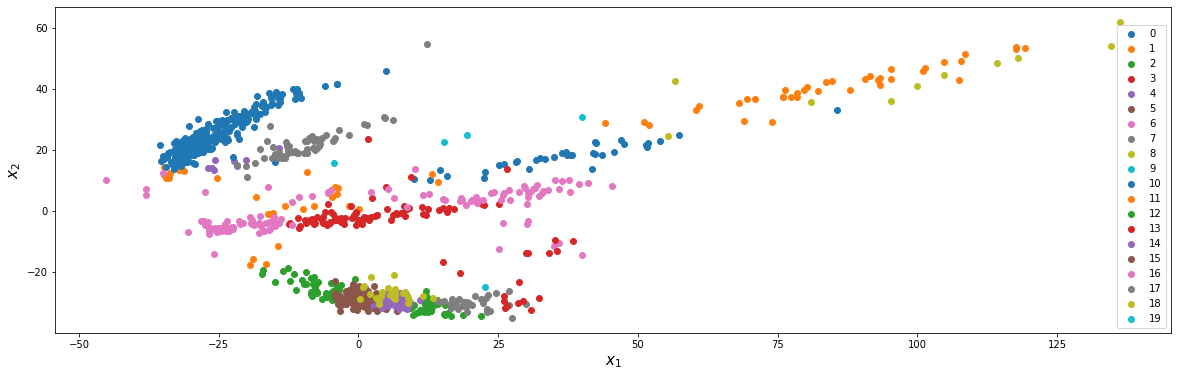

In [57]:
plt.figure(figsize = (20, 6))
for var in np.unique(clusters_pca_20):
    comp = (clusters_pca_20 == var)
    x = df_pc[ comp.ravel(), 0]
    y = df_pc[ comp.ravel(), 1]
    plt.scatter(x, y, label = var)

plt.legend( loc = 'best')
plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15) 


## 3 t-SNE

In this final section, we will visualize the data again using t-SNE - a non-linear dimensionality reduction algorithm. You can learn more about t-SNE in this interactive tutorial: https://distill.pub/2016/misread-tsne/.

**Q10. Use t-SNE to reduce the first 20 principal components of the gene expression dataset to two dimensions. You may use `sklearn.manifold.TSNE`.** Note that it is recommended to first perform PCA before applying t-SNE to suppress noise and speed up computation.

In [58]:
from sklearn.manifold import TSNE

In [59]:
### Your code here

tsne = TSNE(n_components=2, verbose=0, learning_rate = 'auto', init='random' )
tsne_pca_results = tsne.fit_transform(df_pc[:, :20])
# tsne_df = TSNE(n_components = 2).fit_transform(np.array(cell_gene_counts_df_pca))


**Q11. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions.**

No handles with labels found to put in legend.


Text(0, 0.5, 'TSNE second dimension')

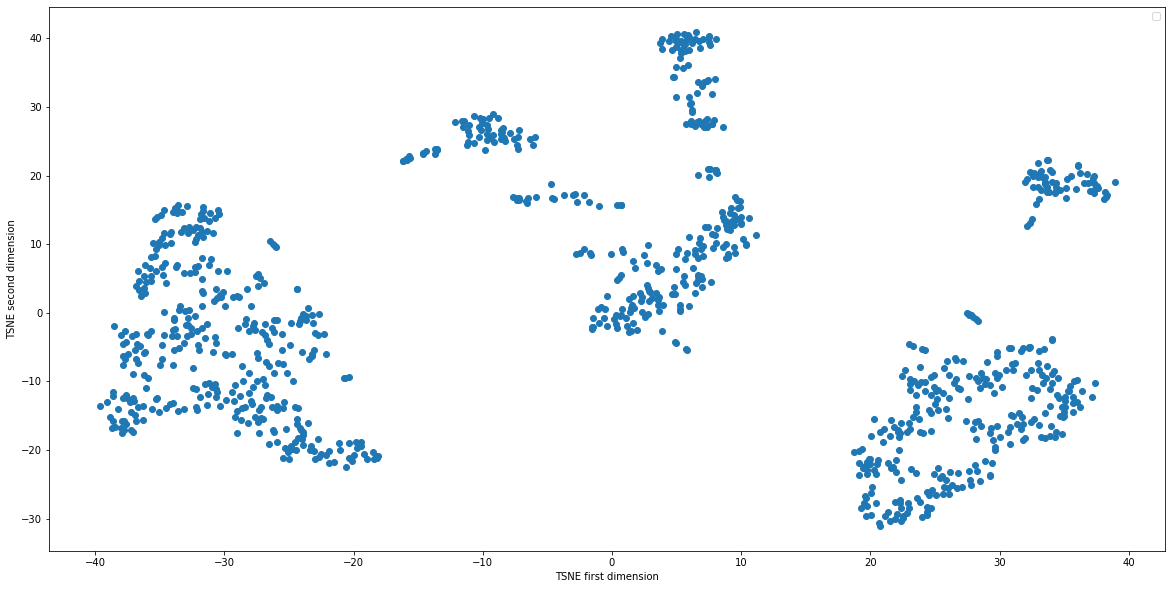

In [68]:
### Your answer here
plt.figure( figsize=( 20, 10 ))

# for item in np.unique(tsne_pca_results ):

#     temp = (tsne_pca_results == item)
axis_x = tsne_pca_results[:, 0]
axis_y = tsne_pca_results[:, 1]
plt.scatter(axis_x, axis_y);

plt.legend()
plt.xlabel('TSNE first dimension')
plt.ylabel('TSNE second dimension')

**Q12. Plot the data (first 20 principal components) projected onto the first two t-SNE dimensions, with points colored by their cluster assignments from part 2.**

In [69]:
### Your code here
list(np.unique(y))

[15.780015156907465, 22.551440756449477, 24.841246801849127, 30.81618947639891]

Text(0, 0.5, 'Second TSNE Dimension')

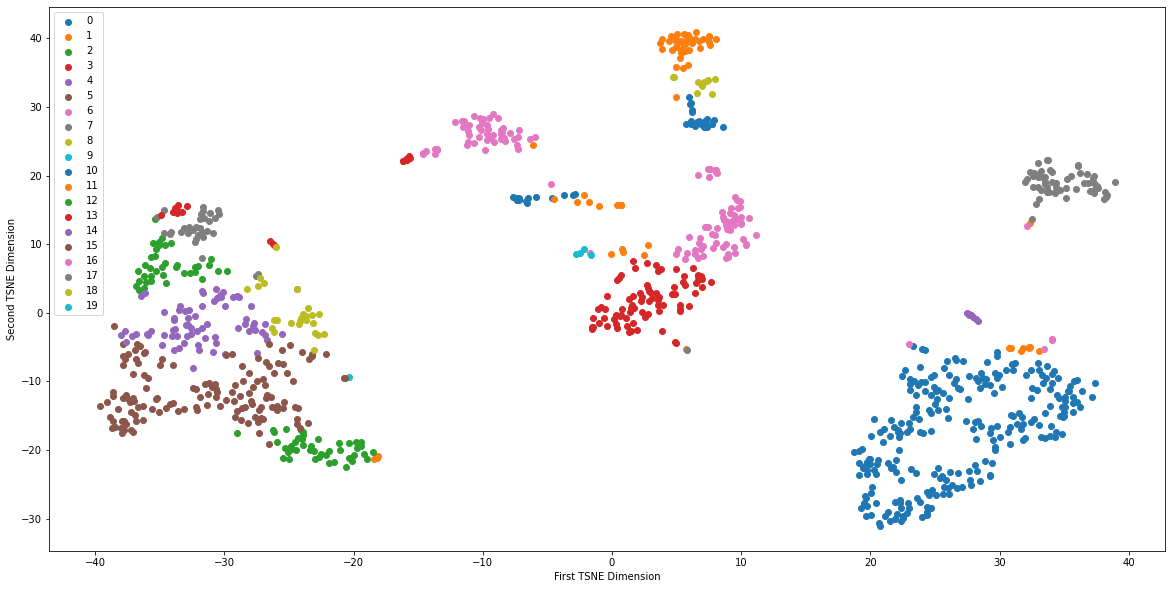

In [70]:
plt.figure( figsize=( 20, 10 ))

for item in np.unique( clusters_pca_20 ):

    temp = ( clusters_pca_20 == item).ravel()
    axis_x = tsne_pca_results[ temp, 0]
    axis_y = tsne_pca_results[ temp, 1]
    plt.scatter(axis_x, axis_y, label = item)

plt.legend()
plt.xlabel('First TSNE Dimension')
plt.ylabel('Second TSNE Dimension')

**Q13. Why is there overlap between points in different clusters in the t-SNE plot above?**

#### Answer: 

t-SNE does not have the capability to preserve distances / density in the original data. 
Hence any density or distance based algorithms for example KNN will not be always displaying t-SNE plots properly . These 20 clusters may correspond to various cell subtypes or cell states. They can be further investigated and mapped to known cell types based on their gene expressions (e.g. using the K-means cluster centers). The clusters may also be used in downstream analysis. For instance, we can monitor how the clusters evolve and interact with each other over time in response to a treatment. Also it happens when we try to see the multi dimensional clusters on 2-d plane it is more likely to over lap and loss of information significantly happens, thus overlap between points in different clusters in the t-SNE plot above is obsereved.